***Intro to Deep Learning***

# 1. A Single Neuron

### What is Deep Learning?
**Deep learning** is an approach to machine learning characterized by deep stacks of computations.

Through their power and scalability neural networks have become the defining model of deep learning. **Neural networks** are composed of neurons, where each neuron individually performs only a simple computation. The power of a neural network comes instead from the complexity of the connections these neurons can form.

---

### The Linear Unit
The linear unit : $y = wx + b$

The **input** is $x$. Its connection to the neuron has a **weight** which is $w$. A neural network "learns" by modifying its weights.

The $b$ is a special kind of weight we call the **bias**. The bias enables the neuron to modify the output independently of its inputs.

The $y$ is the value the neuron ultimately **outputs**. To get the output, the neuron sums up all the values it receives through its connections.

($w$ : the slope, $b$ : the y-intercept)

---

### Multiple Inputs
We can just add more input connections to the neuron, one for each additional feature. To find the output, we would multiply each input to its connection weight and then add them all together.

$y = w_0 x_0 + w_1 x_1 + w_2 x_2 + b$

A linear unit with two inputs will fit a plane, and a unit with more inputs than that will fit a hyperplane.

---

### Linear Units in Keras
`keras.Sequential` : creates a neural network as a stack of layers

`units` : define how many outputs we want

`input_shape` : tell Keras the dimensions of the inputs

* Why is input_shape a Python list?

    The data we'll use in this course will be tabular data, like in a Pandas dataframe. We'll have one input for each feature in the dataset. The features are arranged by column, so we'll always have input_shape=[num_columns]. The reason Keras uses a list here is to permit use of more complex datasets. Image data, for instance, might need three dimensions: [height, width, channels].

In [44]:
from tensorflow import keras
from keras import layers

In [5]:
model = keras.Sequential([
    layers.Dense(units=1, input_shape=[3])
])

# 2. Deep Neural Networks

### Layers
Neural networks typically organize their neurons into **layers**. When we collect together linear units having a common set of inputs we get a **dense** layer. Through a deep stack of layers, a neural network can transform its inputs in more and more complex ways.

---

### The Activation Function
It turns out that two dense layers with nothing in between are no better than a single dense layer by itself. Dense layers by themselves can never move us out of the world of lines and planes. What we need is something **nonlinear**. What we need are activation functions.

Without activation functions, neural networks can only learn linear relationships. In order to fit curves, we'll need to use activation functions.

The most common activation function is the rectifier function (ReLU) $max(0, x)$. Applying a ReLU activation to a linear unit means the output becomes $max(0, wx+b)$.

---

### Stacking Dense Layers
A stack of dense layers makes a "fully-connected" network.

The layers before the output layer are sometimes called **hidden** since we never see their outputs directly.

Now, notice that the **output laye**r is a linear unit (meaning, **no activation function**). That makes this network appropriate to a **regression** task, where we are trying to predict some arbitrary numeric value.

Other tasks (like **classification**) might **require an activation function on the output**.

---

### Building Sequential Models


In [6]:
model = keras.Sequential([
    layers.Dense(units=4, activation='relu', input_shape=[2]),
    layers.Dense(units=3, activation='relu'),
    layers.Dense(units=1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model = keras.Sequential([
    layers.Input(shape=[2]),
    layers.Dense(units=4, activation='relu'),
    layers.Dense(units=3, activation='relu'),
    layers.Dense(units=1)
])

# 3. Stochastic Gradient Descent

When first created, all of the network's weights are set randomly -- the network doesn't "know" anything yet.

Training the network means adjusting its weights in such a way that it can transform the features into the target.

If we can successfully train a network, its weights must represent in some way the relationship between those features and that target as expressed in the training data.

In addition to the training data, we need two more things:

- A "loss function" that measures how good the network's predictions are.
- An "optimizer" that can tell the network how to change its weights.

---

### The Loss Function
The loss function measures the disparity between the the target's true value and the value the model predicts.

A common loss function for regression problems is the mean absolute error (MAE). Besides MAE, other loss functions you might see for regression problems are the mean-squared error (MSE) or the Huber loss.

During training, the model will use the loss function as a guide for finding the correct values of its weights (lower loss is better). In other words, the loss function tells the network its objective.

---

### The Optimizer - Stochastic Gradient Descent
The optimizer is an algorithm that adjusts the weights to minimize the loss.

Virtually all of the optimization algorithms used in deep learning belong to a family called stochastic gradient descent. They are iterative algorithms that train a network in steps.

1. Sample some training data and run it through the network to make predictions.
2. Measure the loss between the predictions and the true values.
3. Finally, adjust the weights in a direction that makes the loss smaller.

    ~ until the loss is as small as you like (or until it won't decrease any further.)

Each iteration's sample of training data is called a **(mini)batch**, while a complete round of the training data is called an **epoch**. The number of epochs you train for is how many times the network will see each training example.

Batch after batch, the line eventually converges to its best fit. You can see that the loss gets smaller as the weights get closer to their true values.

---

### Learning Rate and Batch Size
Notice that the line only makes a small shift in the direction of each batch. The size of these shifts is determined by the **learning rate**.

The learning rate and the size of the minibatches are the two parameters that have the largest effect on how the SGD training proceeds.

Fortunately, for most work it won't be necessary to do an extensive hyperparameter search to get satisfactory results. **Adam** is an SGD algorithm that has an adaptive learning rate that makes it suitable for most problems without any parameter tuning (it is "self tuning", in a sense). Adam is a great general-purpose optimizer.

---

### Adding the Loss and Optimizer


In [9]:
model.compile(
    optimizer='adam',
    loss='mae'
)

### Example - Red Wine Quality

Rescaled each feature to lie in the interval $[0,1]$

→ Neural networks tend to perform best when their inputs are on a common scale

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
import pandas as pd
from IPython.display import display

red_wine = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Euron/red-wine.csv')

In [29]:
# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


In [30]:
print(X_train.shape)

(1119, 11)


In [31]:
model = keras.Sequential([
    layers.Input(shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1)
])

In [32]:
model.compile(
    optimizer='adam',
    loss='mae'
)

In [33]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=20)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.3689 - val_loss: 0.1423
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1399 - val_loss: 0.1282
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1225 - val_loss: 0.1190
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1197 - val_loss: 0.1184
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1119 - val_loss: 0.1061
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1071 - val_loss: 0.1074
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1050 - val_loss: 0.1016
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.1019 - val_loss: 0.1053
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.1029 - val_loss: 0.1000
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.1018 - val_loss: 0.0991
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.1001 - val_loss: 0.1024
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.1007 - val_loss: 0.1046
E

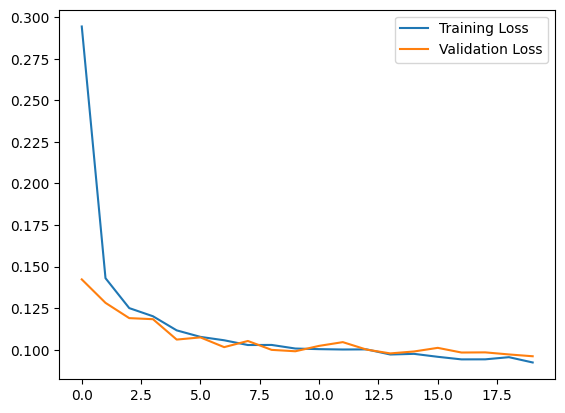

In [39]:
import matplotlib.pyplot as plt

# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot(label='Training Loss')
history_df['val_loss'].plot(label='Validation Loss')
plt.legend()
plt.show()

# 4. Overfitting and Underfitting

### Interpreting the Learning Curves
You might think about the information in the training data as being of two kinds: signal and noise.

The signal is the part that generalizes, the part that can help our model make predictions from new data.

The noise is that part that is only true of the training data; the noise is all of the random fluctuation that comes from data in the real-world or all of the incidental, non-informative patterns that can't actually help the model make predictions.

The validation loss gives an estimate of the expected error on unseen data. It will go down only when the model learns signal. When a model learns signal both curves go down, but when it learns noise a gap is created in the curves. The size of the gap tells you how much noise the model has learned.

We can get the model to learn more signal at the cost of learning more noise. So long as the trade is in our favor, the validation loss will continue to decrease. After a certain point, however, the trade can turn against us, the cost exceeds the benefit, and the validation loss begins to rise. This trade-off indicates that there can be two problems that occur when training a model: not enough signal or too much noise.
- **Underfitting** the training set is when the loss is not as low as it could be because the model *hasn't learned enough signal*.
- **Overfitting** the training set is when the loss is not as low as it could be because the model *learned too much noise*.

---

### Capacity
A model's capacity refers to the size and complexity of *the patterns it is able to learn*. For neural networks, this will largely be determined by *how many neurons it has* and *how they are connected together*.

You can increase the capacity of a network either by making it **wider** (*more units* to existing layers) or by making it **deeper** (adding *more layers*). Wider networks have an easier time learning more linear relationships, while deeper networks prefer more nonlinear ones.

In [41]:
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(1)
])

wider = keras.Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

deeper = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)
])

---

### Early Stopping
To prevent overfitting, we can simply stop the training whenever it seems the validation loss isn't decreasing anymore.

→ We keep the model where the validation loss is at a minimum.

Training with early stopping also means we're in less danger of stopping the training too early, before the network has finished learning signal.


In [47]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True
)

'''
These parameters say: "If there hasn't been at least an improvement of 0.001 in
the validation loss over the previous 20 epochs, then stop the training and keep
 the best model you found."
'''

We'll pass this callback to the `fit` method along with the loss and optimizer.

---

### Example - Train a Model with Early Stopping

In [48]:
red_wine = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Euron/red-wine.csv')

In [49]:
# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


In [51]:
early_stopping = EarlyStopping(
    min_delta=0.001,
    patience=20,
    restore_best_weights=True
)

model = keras.Sequential([
    layers.Input(shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1)
])
model.compile(
    optimizer='adam',
    loss='mae'
)

Minimum validation loss: 0.0934627503156662


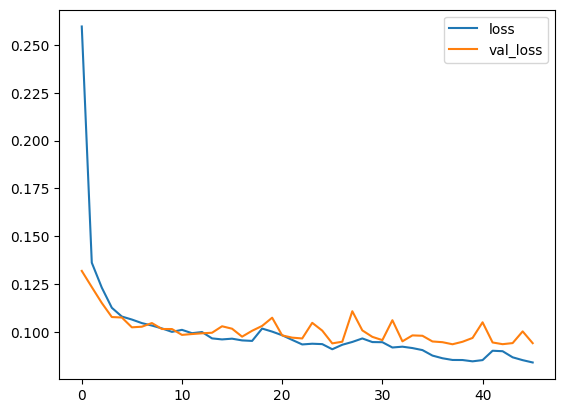

In [52]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=0,  # turn off training log
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

# 5. Dropout and Batch Normalization

### Dropout
Dropout layer can help correct overfitting.

Overfitting is caused by the network *learning spurious patterns* in the training data.

→ To recognize these spurious patterns a network will often rely on very *a specific combinations of weight*, a kind of "conspiracy" of weights.

⇒ **Dropout** : To break up these conspiracies, we *randomly drop out some fraction of a layer's input units every step of training*, making it much harder for the network to learn those spurious patterns in the training data. Instead, it has to search for broad, general patterns, whose weight patterns tend to be more robust.

You could also think about dropout as creating a kind of *ensemble of networks*. The predictions will no longer be made by one big network, but instead by a committee of smaller networks. Individuals in the committee tend to make different kinds of mistakes, but be right at the same time, making the committee as a whole better than any individual.

In [53]:
keras.Sequential([
    # ...
    layers.Dropout(rate=0.3), # apply 30% dropout to the next layer
    layers.Dense(16),
    # ...
])

<Sequential name=sequential_16, built=False>

---

### Batch Normalization
Batch normalization (batchnorm) can help correct training that is slow or unstable.

With neural networks, it's generally a good idea to put all of your data on a *common scale*. The reason is that SGD will shift the network weights in proportion to how large an activation the data produces. Features that tend to produce activations of very different sizes can make for unstable training behavior.

We have a special kind of layer that can do this, the batch normalization layer. A batch normalization layer looks at each batch as it comes in, first normalizing the batch with its own mean and standard deviation, and then also putting the data on a new scale with two trainable rescaling parameters. Batchnorm, in effect, performs a kind of coordinated rescaling of its inputs.

- Most often, batchnorm is added as an aid to the optimization process.
- Models with batchnorm tend to need fewer epochs to complete training.
- Batchnorm can also fix various problems that can cause the training to get "stuck".

It seems that batch normalization can be used at almost any point in a network.
You can put it after a layer...
```
layers.Dense(16, activation='relu'),
layers.BatchNormalization(),
```
... or between a layer and its activation function:
```
layers.Dense(16),
layers.BatchNormalization(),
layers.Activation('relu'),
```
And if you add it as the first layer of your network it can act as a kind of adaptive preprocessor, standing in for something like Sci-Kit Learn's `StandardScaler`.

---

### Example - Using Dropout and Batch Normalization

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)

In [57]:
red_wine = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Euron/red-wine.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

In [59]:
model = keras.Sequential([
    layers.Input(shape=[11]),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1)
])

In [60]:
model.compile(
    optimizer='adam',
    loss='mae'
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=100,
    verbose=0
)

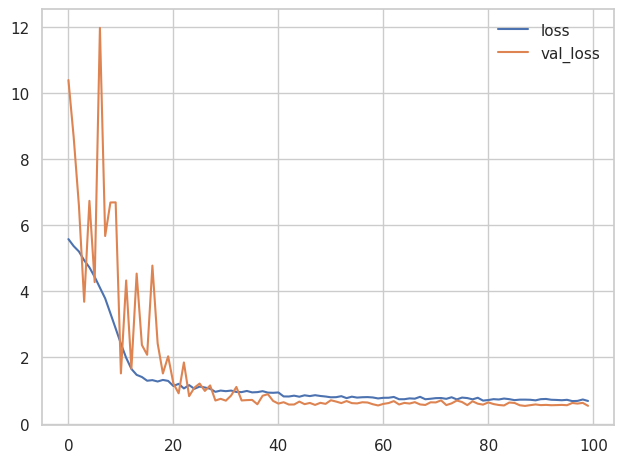

In [61]:
# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

# 6. Binary Classification

The main difference between regression and classification is in the *loss function* we use and in *what kind of outputs* we want the final layer to produce.

### Binary Classification
In your raw data, the classes might be represented by strings like "Yes" and "No", or "Dog" and "Cat". Before using this data we'll assign a class label: one class will be `0` and the other will be `1`. Assigning numeric labels puts the data in a form a neural network can use.

---

### Accuracy and Cross-Entropy
**Accuracy** is one of the many metrics in use for measuring success on a classification problem. Accuracy is the ratio of correct predictions to total predictions.

The problem with accuracy (and most other classification metrics) is that it can't be used as a loss function. Accuracy, being a ratio of counts, changes in "jumps", not smoothly.

So, we have to choose a substitute to act as the loss function. This substitute is the **cross-entropy** function.

For classification, what we want instead is a *distance between probabilities*, and this is what cross-entropy provides. Cross-entropy is a sort of measure for the distance from one probability distribution to another.

The idea is that we want our network to predict the correct class with probability 1.0. The further away the predicted probability is from 1.0, the greater will be the cross-entropy loss.

---

### Making Probabilities with the Sigmoid Function
The cross-entropy and accuracy functions both require probabilities as inputs, meaning, numbers from 0 to 1. To covert the real-valued outputs produced by a dense layer into probabilities, we attach a new kind of activation function, the **sigmoid activation**.

To get the final class prediction, we define a *threshold* probability. Typically this will be 0.5, so that rounding will give us the correct class: below 0.5 means the class with label 0 and 0.5 or above means the class with label 1.

---

### Example - Binary Classification


In [62]:
ion = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Euron/ion.csv', index_col=0)
display(ion.head())

df = ion.copy()
df['Class'] = df['Class'].map({'good': 0, 'bad': 1})

df_train = df.sample(frac=0.7, random_state=0)
df_valid = df.drop(df_train.index)

max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)

df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)
df_train.dropna(axis=1, inplace=True) # drop the empty feature in column 2
df_valid.dropna(axis=1, inplace=True)

X_train = df_train.drop('Class', axis=1)
X_valid = df_valid.drop('Class', axis=1)
y_train = df_train['Class']
y_valid = df_valid['Class']

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
1,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,good
2,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,bad
3,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,good
4,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,bad
5,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,good


In [65]:
model = keras.Sequential([
    layers.Input(shape=[33]),
    layers.Dense(4, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [66]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

In [67]:
early_stopping = EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0 # hide the output because we have so many epochs
)

Best Validation Loss: 0.5548
Best Validation Accuracy: 0.7810


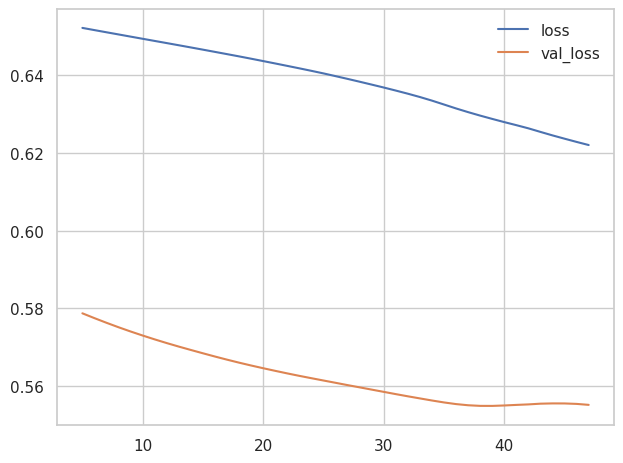

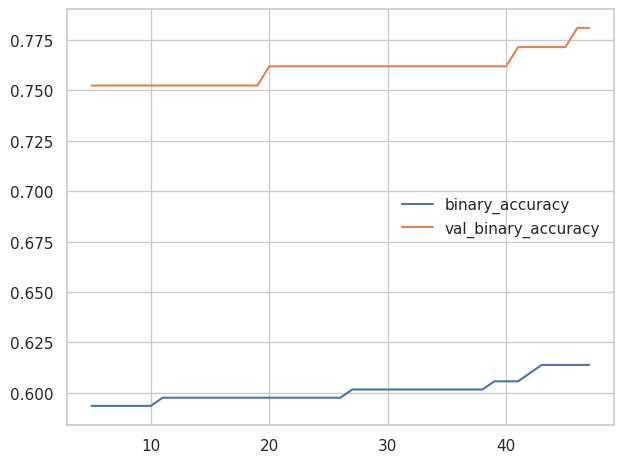

In [68]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(),
              history_df['val_binary_accuracy'].max()))